In [2]:
import pandas as pd

# Replace 'my_data.csv' with your CSV file path or URL
csv_file_path = 'acndata_sessions.csv'

# Read the CSV into a DataFrame
df = pd.read_csv(csv_file_path)

# Print the first 5 rows
df.head()

,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,5bc90cb9f9af8b0d7fe77cd2,39,"Wed, 25 Apr 2018 11:08:04 GMT","Wed, 25 Apr 2018 13:20:10 GMT","Wed, 25 Apr 2018 13:21:10 GMT",7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,NaN
1,5bc90cb9f9af8b0d7fe77cd3,39,"Wed, 25 Apr 2018 13:45:10 GMT","Thu, 26 Apr 2018 00:56:16 GMT","Wed, 25 Apr 2018 16:44:15 GMT",10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,NaN
2,5bc90cb9f9af8b0d7fe77cd4,39,"Wed, 25 Apr 2018 13:45:50 GMT","Wed, 25 Apr 2018 23:04:45 GMT","Wed, 25 Apr 2018 14:51:44 GMT",5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,NaN
3,5bc90cb9f9af8b0d7fe77cd5,39,"Wed, 25 Apr 2018 14:37:06 GMT","Wed, 25 Apr 2018 23:55:34 GMT","Wed, 25 Apr 2018 16:05:22 GMT",5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,NaN
4,5bc90cb9f9af8b0d7fe77cd6,39,"Wed, 25 Apr 2018 14:40:34 GMT","Wed, 25 Apr 2018 23:03:12 GMT","Wed, 25 Apr 2018 17:40:30 GMT",10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,NaN


Eerste paar rijen van de dataset:
                        _id  clusterID                 connectionTime  \
0  5bc90cb9f9af8b0d7fe77cd2         39  Wed, 25 Apr 2018 11:08:04 GMT   
1  5bc90cb9f9af8b0d7fe77cd3         39  Wed, 25 Apr 2018 13:45:10 GMT   
2  5bc90cb9f9af8b0d7fe77cd4         39  Wed, 25 Apr 2018 13:45:50 GMT   
3  5bc90cb9f9af8b0d7fe77cd5         39  Wed, 25 Apr 2018 14:37:06 GMT   
4  5bc90cb9f9af8b0d7fe77cd6         39  Wed, 25 Apr 2018 14:40:34 GMT   

                  disconnectTime               doneChargingTime  kWhDelivered  \
0  Wed, 25 Apr 2018 13:20:10 GMT  Wed, 25 Apr 2018 13:21:10 GMT         7.932   
1  Thu, 26 Apr 2018 00:56:16 GMT  Wed, 25 Apr 2018 16:44:15 GMT        10.013   
2  Wed, 25 Apr 2018 23:04:45 GMT  Wed, 25 Apr 2018 14:51:44 GMT         5.257   
3  Wed, 25 Apr 2018 23:55:34 GMT  Wed, 25 Apr 2018 16:05:22 GMT         5.177   
4  Wed, 25 Apr 2018 23:03:12 GMT  Wed, 25 Apr 2018 17:40:30 GMT        10.119   

                                sessionI

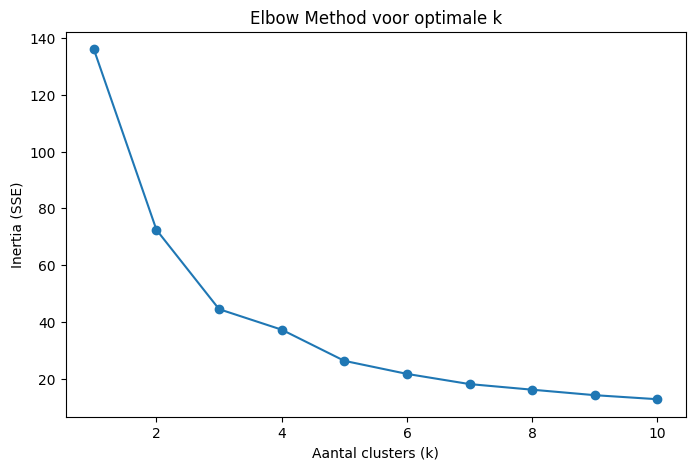

Silhouette Score voor k=4: 0.40

Voorbeeld met clusterlabels:
   kWhDelivered  duration_hours  Cluster
0         7.932        2.201667        0
1        10.013       11.185000        0
2         5.257        9.315278        0
3         5.177        9.307778        0
4        10.119        8.377222        0
5         7.910       10.561111        0
6        15.294        3.669167        1
7         6.953        4.134444        0
8         2.174        3.081667        3
9         2.439        3.286111        3


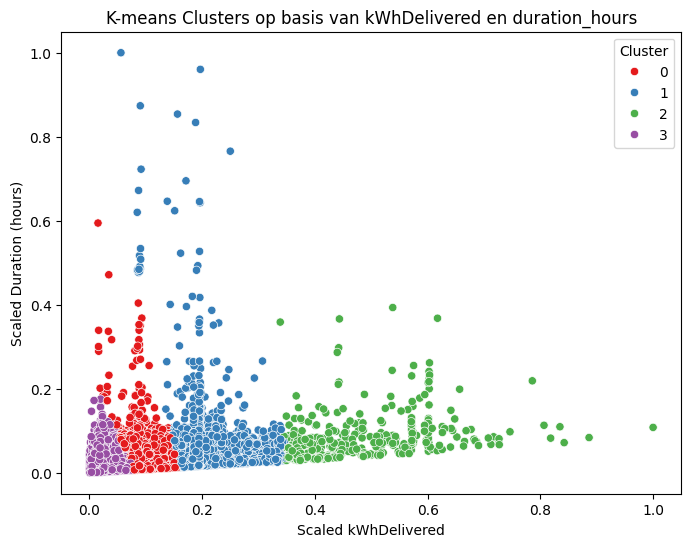


Gemiddelde waarden per cluster:
         kWhDelivered  duration_hours
Cluster                              
0            7.581687        5.921029
1           14.054964        7.891973
2           34.508137       11.251701
3            2.956188        3.186606


In [18]:
# 1. Data inladen en inspecteren
# Pas het pad aan naar jullie datasetbestand
df = pd.read_csv('acndata_sessions.csv')
print("Eerste paar rijen van de dataset:")
print(df.head())
print("\nInformatie over de dataset:")
print(df.info())

# 2. (Optioneel) Tijdkolommen converteren naar datetime en een duur berekenen
# Als je 'connectionTime' en 'disconnectTime' gebruikt voor de clustering,
# kan het handig zijn om deze kolommen te converteren naar datetime-objecten.
df['connectionTime'] = pd.to_datetime(df['connectionTime'], errors='coerce')
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'], errors='coerce')
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'], errors='coerce')

# Bereken de totale laadtijd in uren
df['duration_hours'] = (df['disconnectTime'] - df['connectionTime']).dt.total_seconds() / 3600

# Verwijder rijen met missende waarden in de relevante kolommen
df = df.dropna(subset=['kWhDelivered', 'duration_hours'])

# 3. Selecteer de features voor clustering
# In dit voorbeeld gebruiken we 'kWhDelivered' en 'duration_hours'
X = df[['kWhDelivered', 'duration_hours']].copy()

# 4. Normaliseer de data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 5. Bepaal het optimale aantal clusters met de Elbow Method
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method voor optimale k')
plt.xlabel('Aantal clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.show()

# 6. Bepaal met de silhouette score of de gekozen k waarde passend is
# Kies op basis van de Elbow-plot (bijv. k=3) of experimenteer met andere waardes.
optimal_k = 4  # Pas dit aan indien nodig

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score voor k={optimal_k}: {sil_score:.2f}")

# 7. Voeg de clusterlabels toe aan het oorspronkelijke dataframe
df['Cluster'] = clusters
print("\nVoorbeeld met clusterlabels:")
print(df[['kWhDelivered', 'duration_hours', 'Cluster']].head(10))

# 8. Visualiseer de clusters met een scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0],  # Geschaalde kWhDelivered
    y=X_scaled[:, 1],  # Geschaalde duration_hours
    hue=clusters,
    palette="Set1"
)
plt.title('K-means Clusters op basis van kWhDelivered en duration_hours')
plt.xlabel('Scaled kWhDelivered')
plt.ylabel('Scaled Duration (hours)')
plt.legend(title="Cluster")
plt.show()

# 9. Bekijk de gemiddelde waarden per cluster om inzicht te krijgen in de clusterkenmerken
cluster_summary = df.groupby('Cluster')[['kWhDelivered', 'duration_hours']].mean()
print("\nGemiddelde waarden per cluster:")
print(cluster_summary)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter with PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters Visualized via PCA")
plt.show()


In [20]:
from sklearn.decomposition import PCA

# Create a new scaled matrix if you added new features
features = ['kWhDelivered', 'duration_hours', 'is_weekend']
X_pca_base = df[features]

# Add one-hot columns for time of day
X_pca_base = pd.concat([X_pca_base, df.filter(like='time_of_day_')], axis=1)

# Normalize again
from sklearn.preprocessing import MinMaxScaler
scaler_pca = MinMaxScaler()
X_scaled_pca = scaler_pca.fit_transform(X_pca_base)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_pca)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1')
plt.title("K-Means Clusters Visualized via PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


KeyError: "['is_weekend'] not in index"

In [21]:
cluster_profile = df.groupby('Cluster').agg({
    'kWhDelivered': ['mean', 'median'],
    'duration_hours': ['mean', 'median'],
    'is_weekend': 'mean',
    'hour': ['mean', 'median']
})
print("Cluster Profile Summary:\n")
print(cluster_profile)


KeyError: "Column(s) ['hour', 'is_weekend'] do not exist"

In [22]:
station_stats = df.groupby("stationID").agg({
    "kWhDelivered": ["mean", "sum", "count"],
    "duration_hours": ["mean", "sum"],
    "Cluster": lambda x: x.value_counts().index[0],  # Most common session cluster
}).reset_index()

# Flatten column names
station_stats.columns = ['stationID', 'avg_kWh', 'total_kWh', 'session_count', 'avg_duration', 'total_duration', 'dominant_session_cluster']


In [23]:
from sklearn.preprocessing import StandardScaler

X_station = station_stats[["avg_kWh", "session_count", "avg_duration", "total_kWh"]]
scaler = StandardScaler()
X_station_scaled = scaler.fit_transform(X_station)

from sklearn.cluster import KMeans
k_station = 4  # Try several values
kmeans_station = KMeans(n_clusters=k_station, random_state=42)
station_stats["station_cluster"] = kmeans_station.fit_predict(X_station_scaled)


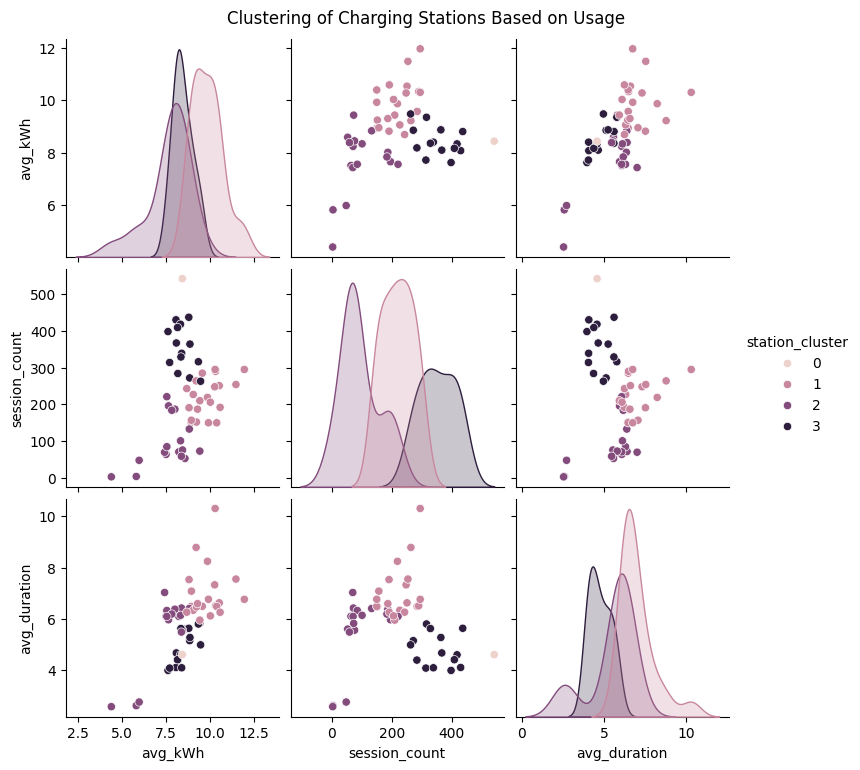

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(station_stats, hue="station_cluster", vars=["avg_kWh", "session_count", "avg_duration"])
plt.suptitle("Clustering of Charging Stations Based on Usage", y=1.02)
plt.show()
